### Main Questions/Hypotheses: 

1. How has pop music changed from the 1990s to the 2010s?
2. What characteristics determine a popular song?

## Libraries/Prelimaries

In [611]:
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [580]:
## load in data: 
df = pd.read_csv('songs_normalize.csv')
df.head()

artist                    song  duration_ms  explicit  year  \
0  Britney Spears  Oops!...I Did It Again       211160     False  2000   
1       blink-182    All The Small Things       167066     False  1999   
2      Faith Hill                 Breathe       250546     False  1999   
3        Bon Jovi            It's My Life       224493     False  2000   
4          *NSYNC             Bye Bye Bye       200560     False  2000   

   popularity  danceability  energy  key  loudness  mode  speechiness  \
0          77         0.751   0.834    1    -5.444     0       0.0437   
1          79         0.434   0.897    0    -4.918     1       0.0488   
2          66         0.529   0.496    7    -9.007     1       0.0290   
3          78         0.551   0.913    0    -4.063     0       0.0466   
4          65         0.614   0.928    8    -4.806     0       0.0516   

   acousticness  instrumentalness  liveness  valence    tempo         genre  
0        0.3000          0.000018    0.3550    0.894   95.053           pop  
1        0.0103          0.000000    0.6120    0.684  148.726     rock, pop  
2        0.1730          0.000000    0.2510    0.278  136.859  pop, country  
3        0.0263          0.000013    0.3470    0.544  119.992   rock, metal  
4        0.0408          0.001040    0.0845    0.879  172.656           pop

### Cleaning Data: 

In [581]:
## remove unnecessary columns/na values: 
df = df.drop(['speechiness', 'key', 'mode'], axis = 1)

In [582]:
#look for duplicates 
dup = df.duplicated(keep = False)
dups = df[dup]

In [583]:
dups.sort_values('artist').head(6)

artist                  song  duration_ms  explicit  year  \
1456  Ariana Grande        Love Me Harder       236133     False  2014   
1562  Ariana Grande        Love Me Harder       236133     False  2014   
431       Baby Bash             Suga Suga       239026     False  2003   
324       Baby Bash             Suga Suga       239026     False  2003   
1929  Billie Eilish  lovely (with Khalid)       200185     False  2018   
1819  Billie Eilish  lovely (with Khalid)       200185     False  2018   

      popularity  danceability  energy  loudness  acousticness  \
1456          74         0.472   0.714    -4.389       0.00937   
1562          74         0.472   0.714    -4.389       0.00937   
431           73         0.662   0.748    -3.041       0.68800   
324           73         0.662   0.748    -3.041       0.68800   
1929          86         0.351   0.296   -10.109       0.93400   
1819          86         0.351   0.296   -10.109       0.93400   

      instrumentalness  liveness  valence    tempo                     genre  
1456          0.000000    0.0764    0.240   98.992                       pop  
1562          0.000000    0.0764    0.240   98.992                       pop  
431           0.000008    0.0841    0.535   82.331  hip hop, pop, R&B, latin  
324           0.000008    0.0841    0.535   82.331  hip hop, pop, R&B, latin  
1929          0.000000    0.0950    0.120  115.284     pop, Dance/Electronic  
1819          0.000000    0.0950    0.120  115.284     pop, Dance/Electronic

In [130]:
## There are 59 duplicates. Although this could imply that the song was popular for multiple years, I think it is odd each duplicate is only duplicated twice. 
## Additionally, based on our project's questions, keeping the duplicates do not benefit us. Therefore, I will remove the duplicates.

In [584]:
df.drop_duplicates(inplace = True, ignore_index = False, keep = 'first')

In [585]:
## look for na values:  
df.isnull().sum()
#hooray! 

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
loudness            0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [586]:
## duration_ms to minute/seconds
df['duration_s'] = df['duration_ms'] / 1000

In [703]:
df.sort_values('year').head(5)
##only three songs form 2020!!! 

artist                    song  duration_ms  explicit  year  \
35   Montell Jordan        Get It On Tonite       276266     False  1999   
30              DMX                Party Up       268866      True  1999   
34   Britney Spears  Born to Make You Happy       243533     False  1999   
75  Destiny's Child        Jumpin', Jumpin'       230200     False  1999   
37            JAY-Z             Big Pimpin'       283066      True  1999   

    popularity  danceability  energy  loudness  acousticness  \
35          59         0.813   0.491    -9.923       0.24100   
30          71         0.510   0.931    -3.302       0.07380   
34          58         0.633   0.922    -4.842       0.11600   
75          70         0.771   0.685    -4.639       0.00543   
37          69         0.880   0.814    -6.307       0.16800   

    instrumentalness  liveness  valence    tempo              genre  \
35          0.000046    0.0817    0.868   99.008  hip hop, pop, R&B   
30          0.000000    0.5000    0.530  201.936       hip hop, pop   
34          0.000465    0.0710    0.686   84.110                pop   
75          0.001570    0.0537    0.683   88.997           pop, R&B   
37          0.006720    0.0584    0.942  138.083            hip hop   

    duration_s  
35     276.266  
30     268.866  
34     243.533  
75     230.200  
37     283.066

In [588]:
#drops rows that contain songs from 2020 and 1998 
df.drop([1991, 568, 308, 44], inplace = True)

### Question 1: How has pop music changed over two decades? 

In [169]:
## subset df of just pop music

In [589]:
pop_df = df[df['genre'].str.strip().str.lower() == 'pop'].copy()

In [723]:
len(pop_df)

415

In [590]:
pop_df.head()

artist                                              song  \
0    Britney Spears                            Oops!...I Did It Again   
4            *NSYNC                                       Bye Bye Bye   
10  Gigi D'Agostino                                  L'Amour Toujours   
11        Eiffel 65  Move Your Body - Gabry Ponte Original Radio Edit   
12     Bomfunk MC's                                        Freestyler   

    duration_ms  explicit  year  popularity  danceability  energy  loudness  \
0        211160     False  2000          77         0.751   0.834    -5.444   
4        200560     False  2000          65         0.614   0.928    -4.806   
10       238759     False  2011           1         0.617   0.728    -7.932   
11       268863     False  1999          56         0.745   0.958    -9.664   
12       306333     False  2000          55         0.822   0.922    -5.798   

    acousticness  instrumentalness  liveness  valence    tempo genre  \
0         0.3000          0.000018    0.3550    0.894   95.053   pop   
4         0.0408          0.001040    0.0845    0.879  172.656   pop   
10        0.0328          0.048200    0.3600    0.808  139.066   pop   
11        0.0813          0.324000    0.5330    0.960  129.962   pop   
12        0.0291          0.325000    0.2520    0.568  163.826   pop   

    duration_s  
0      211.160  
4      200.560  
10     238.759  
11     268.863  
12     306.333

### Visualizations 

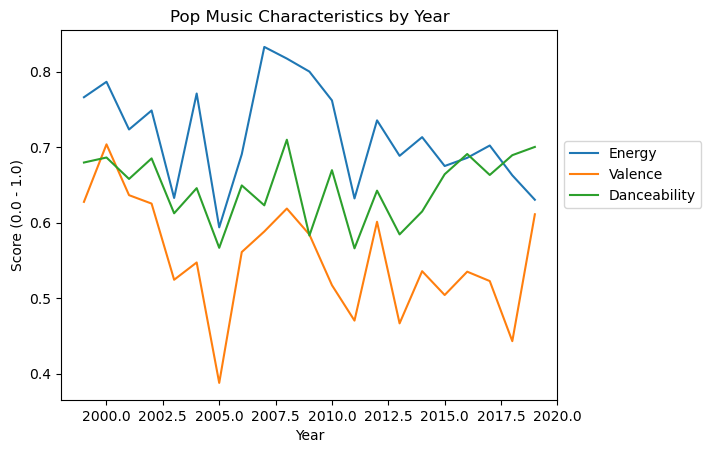

In [591]:
sns.lineplot(x = 'year', y = 'energy', data = pop_df, errorbar = None, label = 'Energy')
sns.lineplot(x = 'year', y = 'valence', data = pop_df, errorbar = None, label = 'Valence')
sns.lineplot(x = 'year', y = 'danceability', data = pop_df, errorbar = None, label = 'Danceability')

plt.legend(loc='lower left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Score (0.0 - 1.0)')
plt.xlabel('Year')
plt.title('Pop Music Characteristics by Year');

In [501]:
## Energy/Valence/Danceability all had a big dip in 2005. They all very quickly, however, had a resurgence from 2006-2011. Danceability has the most stability over the years. 
## Looks like energy and valence have had a slight downward trend, but with many ups and downs in between. 
## This suggests, perhaps, that music trends come and go- some years we prefer upbeat and energetic songs and other years we prefer slower, more solemn ones. 

In [ ]:
Mean Squared Error: 27.388075916246372
Mean Absolute Error: 4.46461812227009
R-squared: 0.19385537947113918
Intercept: 2019.1732116556511
danceability: 6.747905744933901
energy: -1.0993636739592085
valence: -8.111877572061331
duration_s: -0.04917349097447342
tempo: 0.019163756962010194

Text(0.5, 1.0, 'Average Song Length by Year')

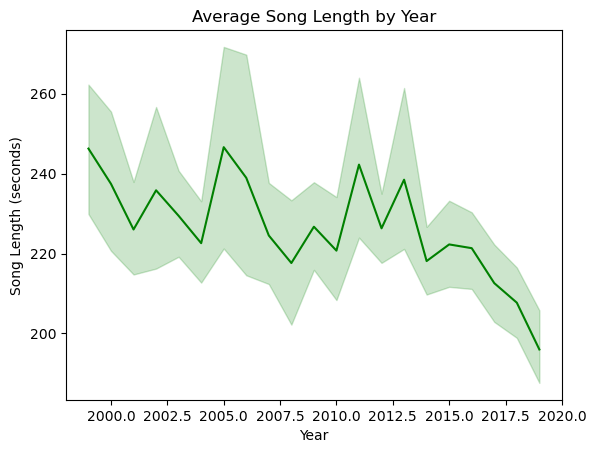

In [592]:
sns.lineplot(x = 'year', y = 'duration_s', data = pop_df, color = 'green')
plt.ylabel('Song Length (seconds)') 
plt.xlabel('Year')
plt.title('Average Song Length by Year')

In [503]:
## A clear trend of average song length's decreasing over the years. 
## Many people theorize that it could be due to the rising popularity of song streaming websites, like Spotify and Apple Music, and the decrease in radio streams. 
## Shorter songs are easier (and literally faster) to generate streams, and thus increasing the artists' profits/monthly listens. 

Text(0.5, 1.0, 'Average Tempo by Year')

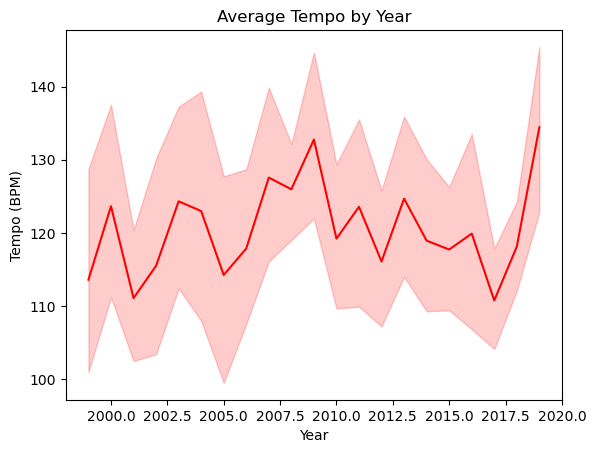

In [593]:
sns.lineplot(x = 'year', y = 'tempo', data = pop_df, color = 'red')
plt.ylabel('Tempo (BPM)') 
plt.xlabel('Year')
plt.title('Average Tempo by Year')

In [554]:
## It looks like there has been an increase in the average tempo over the years. Similar to the first figure, there are many highs and lows, 
## implying a pendulumn-like trend in song tempos. This aligns with our findings of an increase in danceability over the years.

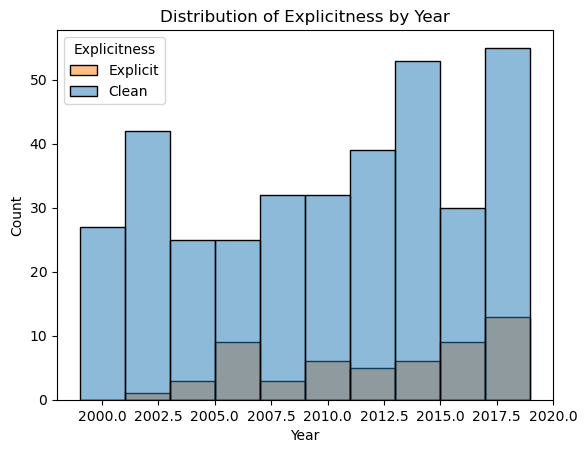

In [594]:
legend_labels = {True: 'Explicit', False: 'Clean'}

sns.histplot(x='year', hue='explicit', data=pop_df)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Explicitness by Year')

# Create custom legend
plt.legend(title='Explicitness', labels=[legend_labels[True], legend_labels[False]])


In [505]:
## Songs seem to be increasing in explicitness. 

In [705]:
X_new = [[0.695, 0.762, 0.553, 215.28, 120.042]]  # Example values for danceability, energy, valence, duration, tempo
predicted_year = model.predict(X_new)
print("Predicted Release Year for New Song:", predicted_year[0])


/Users/ruthcarter/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 5 features, but LinearRegression is expecting 1 features as input.

In [702]:

X= pop_df[['year']]  # Independent variable
y = pop_df[['danceability', 'energy', 'valence', 'duration_s', 'tempo']]  # Dependent variables

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the dependent variables on the test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


for variable, coefficient in zip(y.columns, model.intercept_):
    print(f"{variable} y-int: {coefficient}")

for variable, coefficient in zip(y.columns, model.coef_):
    print(f"{variable}: {coefficient}")


Mean Squared Error: 334.1059534244637
Mean Absolute Error: 8.906518757686142
R-squared: -0.02736584844209995
danceability y-int: -1.3239416261851025
energy y-int: 9.209635673296637
valence y-int: 7.368591486115355
duration_s y-int: 3199.259691368515
tempo y-int: -163.94707047218537
danceability: [0.0009772]
energy: [-0.00422858]
valence: [-0.00339377]
duration_s: [-1.47982344]
tempo: [0.14146664]


### Question 2: What characteristics determine a popular song?

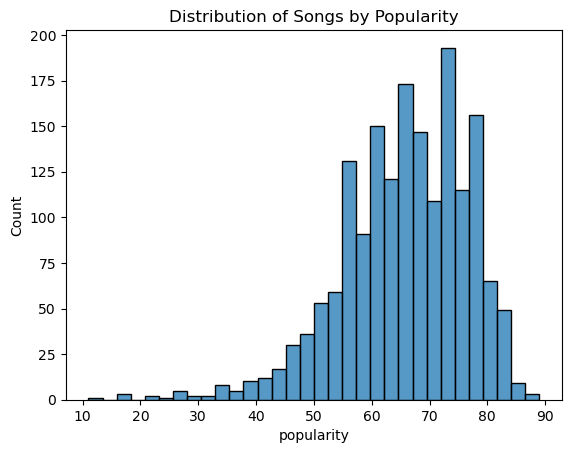

In [711]:
sns.histplot(x='popularity', data = popular_df)
plt.title('Distribution of Songs by Popularity');

In [596]:
### Its super weird to have so many 0 values. It must be a data entry error, so I will remove all 0 popularity value rows

In [548]:
sorted_values = df.sort_values('popularity')[:179]
popular_df = df.drop(sorted_values.index)

In [724]:
len(popular_df)

1758

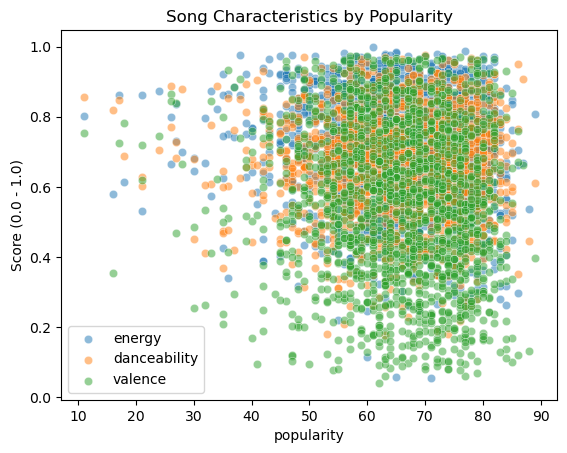

In [713]:
sns.scatterplot(x = 'popularity', y= 'energy', data = popular_df, alpha = .5, label = 'energy')
sns.scatterplot(x = 'popularity', y= 'danceability', data = popular_df, alpha = .5, label = 'danceability')
sns.scatterplot(x = 'popularity', y= 'valence', data = popular_df, alpha = .5, label = 'valence')

plt.title('Song Characteristics by Popularity')
plt.ylabel('Score (0.0 - 1.0)')
plt.legend()

In [527]:
cor_mat_df = df[['danceability', 'valence', 'energy', 'year', 'tempo', 'popularity']]

              danceability   valence    energy      year     tempo  popularity
danceability      1.000000  0.403746 -0.103179  0.034509 -0.167254    0.000443
valence           0.403746  1.000000  0.333088 -0.209182 -0.023014   -0.011589
energy           -0.103179  0.333088  1.000000 -0.113795  0.150806   -0.012853
year              0.034509 -0.209182 -0.113795  1.000000  0.075937   -0.005724
tempo            -0.167254 -0.023014  0.150806  0.075937  1.000000    0.011369
popularity        0.000443 -0.011589 -0.012853 -0.005724  0.011369    1.000000


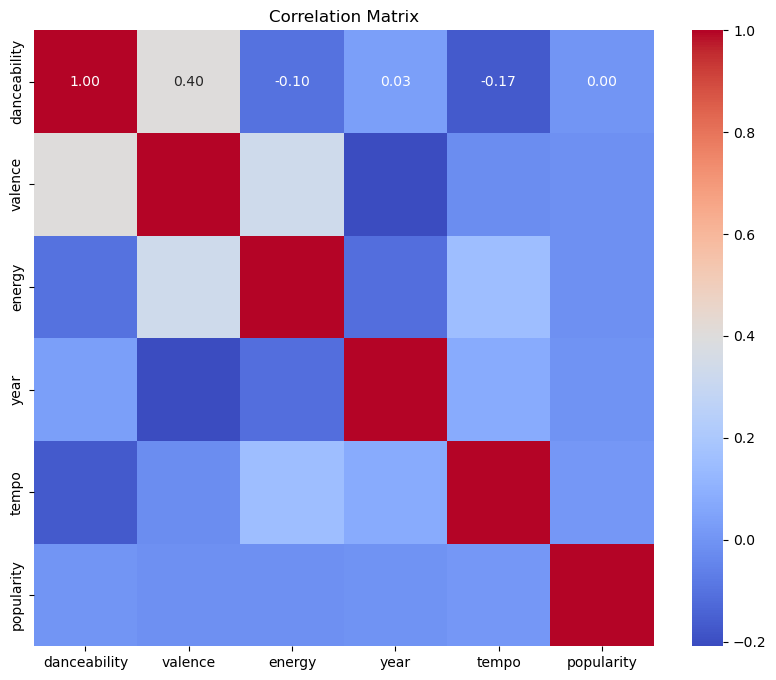

In [553]:

# Calculate the correlation matrix
correlation_matrix = cor_mat_df.corr()

# Print the correlation matrix
print(correlation_matrix)

# Generate heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()



In [576]:
## No notable correlations with popularity :(

### Question 2b: What artist has the widest popularity IQR and how do their song characteristics change as their music gets more popular? 

In [679]:
popular_df.loc[df['artist'] == '*NSYNC']


artist              song  duration_ms  explicit  year  popularity  \
4    *NSYNC       Bye Bye Bye       200560     False  2000          65   
86   *NSYNC  It's Gonna Be Me       191040     False  2000          60   
198  *NSYNC              Gone       292000     False  2001          45   
283  *NSYNC        Girlfriend       253600     False  2001          50   

     danceability  energy  loudness  acousticness  instrumentalness  liveness  \
4           0.614   0.928    -4.806        0.0408          0.001040    0.0845   
86          0.644   0.874    -4.666        0.0459          0.000002    0.0584   
198         0.699   0.403    -8.564        0.4210          0.000000    0.1260   
283         0.745   0.807    -5.191        0.0887          0.000015    0.0283   

     valence    tempo genre  duration_s  
4      0.879  172.656   pop      200.56  
86     0.882  165.090   pop      191.04  
198    0.500  113.922   pop      292.00  
283    0.858   93.967   pop      253.60

In [654]:
popular_df.sort_values('popularity', ascending = False)

artist  \
1322                          The Neighbourhood   
1311                                  Tom Odell   
201                                      Eminem   
1819                              Billie Eilish   
1613                                     WILLOW   
6                                        Eminem   
1999                                Post Malone   
1514                                     Avicii   
1512                          The Neighbourhood   
1709                                 Ed Sheeran   
209                                      Eminem   
1227                                 Bruno Mars   
1344                             Arctic Monkeys   
1326                             Arctic Monkeys   
1408                                John Legend   
1511                                 The Weeknd   
1905                              Gesaffelstein   
1601                                      Drake   
1700                                 Ed Sheeran   
1701                                  Sean Paul   
1910                              Lewis Capaldi   
1712                              Billie Eilish   
1805                                 Juice WRLD   
1711                               Travis Scott   
1801                                Post Malone   
1752                               XXXTENTACION   
1568                                Tame Impala   
1708                           The Chainsmokers   
102                                      Eminem   
1603                           The Chainsmokers   
1903                              Ariana Grande   
1474                              One Direction   
1398                                 Bruno Mars   
1306                                  Daft Punk   
1901                              Billie Eilish   
1527                          Twenty One Pilots   
20                                  Linkin Park   
1463                                       MKTO   
19                                      Dr. Dre   
600                                     Shakira   
1908                                  Lady Gaga   
614                               Nelly Furtado   
1719                             French Montana   
1916                              Alec Benjamin   
1654                               Shawn Mendes   
1610                                   Coldplay   
130                                     Outkast   
529                                    Gorillaz   
912                                  Kanye West   
923                                       JAY-Z   
1510                               Taylor Swift   
1500                                Mark Ronson   
1139                                   Coldplay   
1171                          Foster The People   
1209                                      JAY-Z   
1238                                   Maroon 5   
1809                               XXXTENTACION   
1273                              One Direction   
1843                                girl in red   
1864                                 Marshmello   
1828                               XXXTENTACION   
709                               Nelly Furtado   
402                              Britney Spears   
1118                                    Pitbull   
1571                                     Hozier   
1769                                Post Malone   
701                                     Rihanna   
1632                                   DJ Snake   
1483                              One Direction   
1710                                       MGMT   
1502                                Wiz Khalifa   
1729                               Lil Uzi Vert   
1054                              Justin Bieber   
1893                                       Lauv   
1001                                     Eminem   
1501                                 Ed Sheeran   
1800                                      Drake   
1123                           Gym Class Heroes   
1960        

In [712]:
def calculate_iqr(x):
    q3, q1 = np.percentile(x, [75 ,25])
    return q3 - q1

popularity_iqr = df.groupby('artist')['popularity'].apply(calculate_iqr)

artist_with_largest_iqr = popularity_iqr.head()

print(artist_with_largest_iqr)

artist
*NSYNC       12.5
112           3.0
2 Chainz      1.0
21 Savage     2.0
2Pac          5.5
Name: popularity, dtype: float64


In [672]:
calv_df =  df[(df['artist'] == "Calvin Harris")]

In [680]:
nsync_df = df[(df['artist'] == "*NSYNC")]

In [725]:
len(nsync_df)

4

Text(0.5, 1.0, "NSYNC Songs' Popularity")

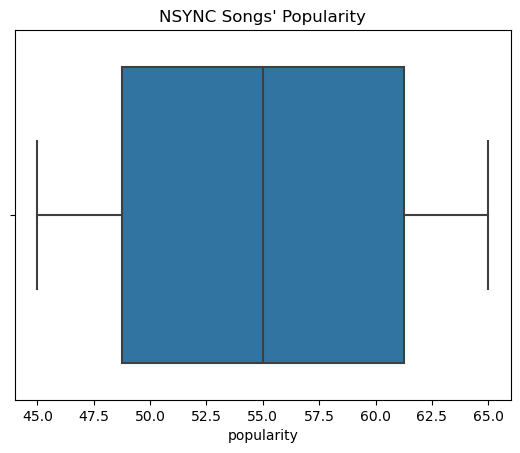

In [715]:
sns.boxplot(x = 'popularity', data = nsync_df)
plt.title('NSYNC Songs\' Popularity')

Text(0, 0.5, 'Score (0.0-1.0)')

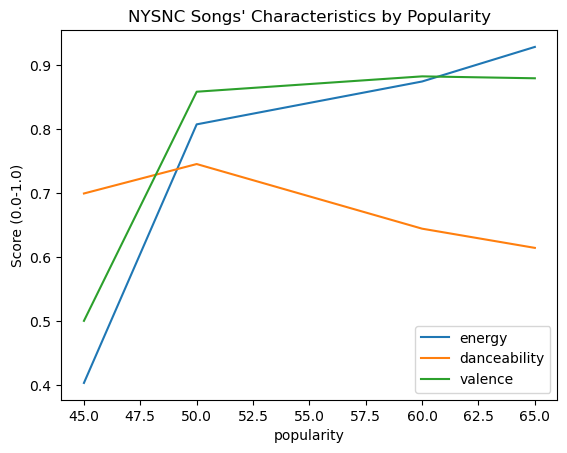

In [716]:
sns.lineplot(x = 'popularity', y = 'energy', data = nsync_df, label = 'energy')
sns.lineplot(x = 'popularity', y = 'danceability', data = nsync_df, label = 'danceability')
sns.lineplot(x = 'popularity', y = 'valence', data = nsync_df, label = 'valence')

plt.title('NYSNC Songs\' Characteristics by Popularity')
plt.ylabel('Score (0.0-1.0)')

Text(0.5, 1.0, "NYSNC Songs' Length by Popularity")

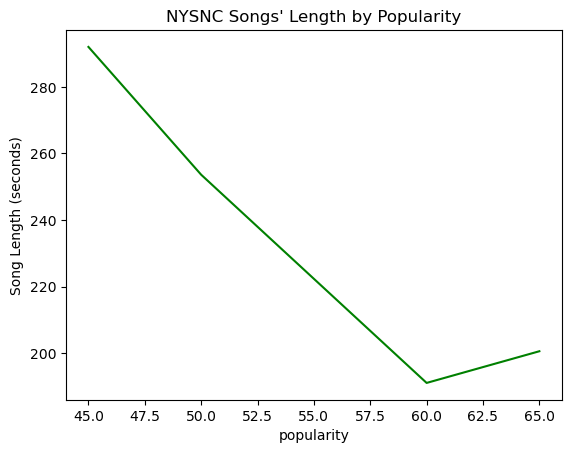

In [718]:
sns.lineplot(x = 'popularity', y = 'duration_s', data = nsync_df, color = 'green')
plt.ylabel('Song Length (seconds)') 
plt.xlabel('popularity')
plt.title('NYSNC Songs\' Length by Popularity')

Text(0.5, 1.0, "NYSNC Songs' Tempo by Popularity")

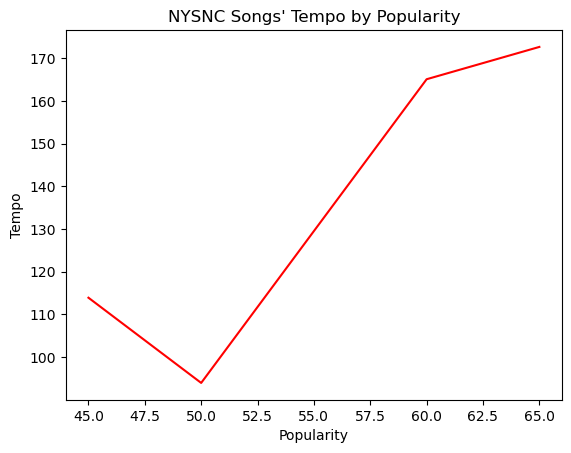

In [719]:
sns.lineplot(x = 'popularity', y = 'tempo', data = nsync_df, color = 'red')
plt.ylabel('Tempo') 
plt.xlabel('Popularity')
plt.title('NYSNC Songs\' Tempo by Popularity')

In [691]:

X = nsync_df[['popularity']]  # Independent variable
y = nsync_df[['danceability', 'energy', 'valence', 'duration_s', 'tempo']]  # Dependent variables

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the dependent variables on the test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


for variable, coefficient in zip(y.columns, model.intercept_):
    print(f"{variable} y-int: {coefficient}")

for variable, coefficient in zip(y.columns, model.coef_):
    print(f"{variable}: {coefficient}")


Mean Squared Error: 211.48590337278173
Mean Absolute Error: 8.79258461538463
R-squared: nan
danceability y-int: 0.9678461538461536
energy y-int: -0.46353846153846157
valence y-int: -0.04899999999999971
duration_s y-int: 479.8092307692307
tempo y-int: -58.197000000000045
danceability: [-0.00528462]
energy: [0.02205385]
valence: [0.0149]
duration_s: [-4.33292308]
tempo: [3.4696]


/Users/ruthcarter/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
